In [3]:
%matplotlib inline

import numpy as np
import torch
from torch import optim

torch.set_printoptions(edgeitems=2)

In [4]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [5]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([10,  3,  1,  9,  8,  7,  2,  6,  0]), tensor([5, 4]))

In [6]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [7]:
from torch import nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[-3.9486],
        [-4.5894]], grad_fn=<AddmmBackward0>)

In [8]:
linear_model.weight

Parameter containing:
tensor([[-0.8659]], requires_grad=True)

In [9]:
linear_model.bias

Parameter containing:
tensor([0.2858], requires_grad=True)

In [10]:
x = torch.ones(1)
linear_model(x)

tensor([-0.5801], grad_fn=<ViewBackward0>)

In [11]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.5801],
        [-0.5801],
        [-0.5801],
        [-0.5801],
        [-0.5801],
        [-0.5801],
        [-0.5801],
        [-0.5801],
        [-0.5801],
        [-0.5801]], grad_fn=<AddmmBackward0>)

In [12]:
linear_model = nn.Linear(1, 1) # <1>

optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [13]:
linear_model.parameters()

<generator object Module.parameters at 0x7fb6a497cd60>

In [14]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.1082]], requires_grad=True),
 Parameter containing:
 tensor([0.1222], requires_grad=True)]

In [15]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print("Epoch {}, Training loss {}, Validation loss {}".format(
                epoch, float(loss_train), float(loss_val)))

In [16]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=loss_fn,
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 111.85333251953125, Validation loss 27.57196044921875
Epoch 1000, Training loss 3.550389289855957, Validation loss 3.914632797241211
Epoch 2000, Training loss 2.97910213470459, Validation loss 3.3771955966949463
Epoch 3000, Training loss 2.969332456588745, Validation loss 3.3139305114746094

Parameter containing:
tensor([[5.3835]], requires_grad=True)
Parameter containing:
tensor([-17.0646], requires_grad=True)


In [17]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 356.666015625, Validation loss 205.07518005371094
Epoch 1000, Training loss 3.4854846000671387, Validation loss 3.876162528991699
Epoch 2000, Training loss 2.9779908657073975, Validation loss 3.3729653358459473
Epoch 3000, Training loss 2.969313383102417, Validation loss 3.3133883476257324

Parameter containing:
tensor([[5.3839]], requires_grad=True)
Parameter containing:
tensor([-17.0669], requires_grad=True)


In [18]:
seq_model = nn.Sequential(
    nn.Linear(1, 13), # <1>
    nn.Tanh(),
    nn.Linear(13, 1)) # <2>

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [19]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [20]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [21]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [22]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [23]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2747], requires_grad=True)

In [24]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 223.50372314453125, Validation loss 104.70616149902344


Epoch 1000, Training loss 6.276014804840088, Validation loss 4.639040470123291
Epoch 2000, Training loss 4.764697551727295, Validation loss 0.26331716775894165
Epoch 3000, Training loss 3.1390089988708496, Validation loss 0.3227476477622986
Epoch 4000, Training loss 2.522108316421509, Validation loss 0.38300830125808716
Epoch 5000, Training loss 2.280278444290161, Validation loss 0.46112626791000366
output tensor([[ 8.4178],
        [12.9619]], grad_fn=<AddmmBackward0>)
answer tensor([[ 8.],
        [11.]])
hidden tensor([[-0.0523],
        [16.3827],
        [ 8.7138],
        [13.3816],
        [-8.9297],
        [ 1.1598],
        [-1.4046],
        [13.3142]])


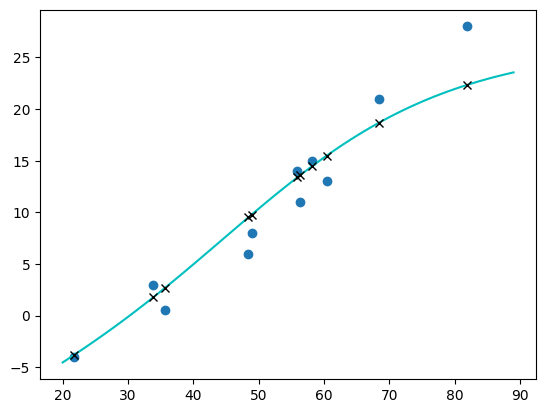

In [30]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 203.06805419921875, Validation loss 87.84864044189453
Epoch 1000, Training loss 71.84480285644531, Validation loss 3.2541871070861816
Epoch 2000, Training loss 49.38682556152344, Validation loss 4.102391242980957
Epoch 3000, Training loss 30.33320426940918, Validation loss 4.489344120025635
Epoch 4000, Training loss 17.214853286743164, Validation loss 4.409778594970703
Epoch 5000, Training loss 10.195605278015137, Validation loss 4.102817535400391


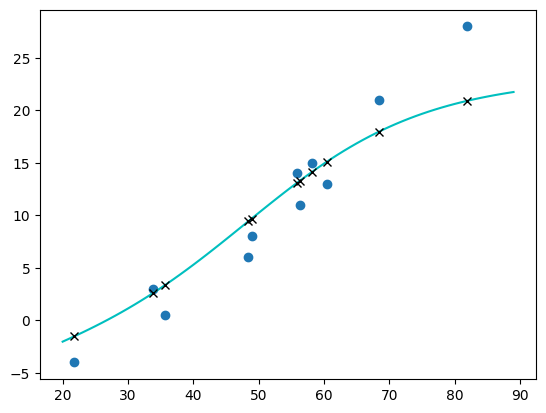

In [31]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4) # <1>

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')